# Todos los códigos de los algoritmos están en este mismo notebook

In [3]:
import random
import time
import tracemalloc
import matplotlib.pyplot as plt

Busqueda lineal

Tamaño     Tiempo (s)      Memoria (MB)    Encontrado  
1000       2.60083699      1.908957        No          
10000      2.60083699      1.908957        No          
100000     2.60083699      1.908957        Sí          


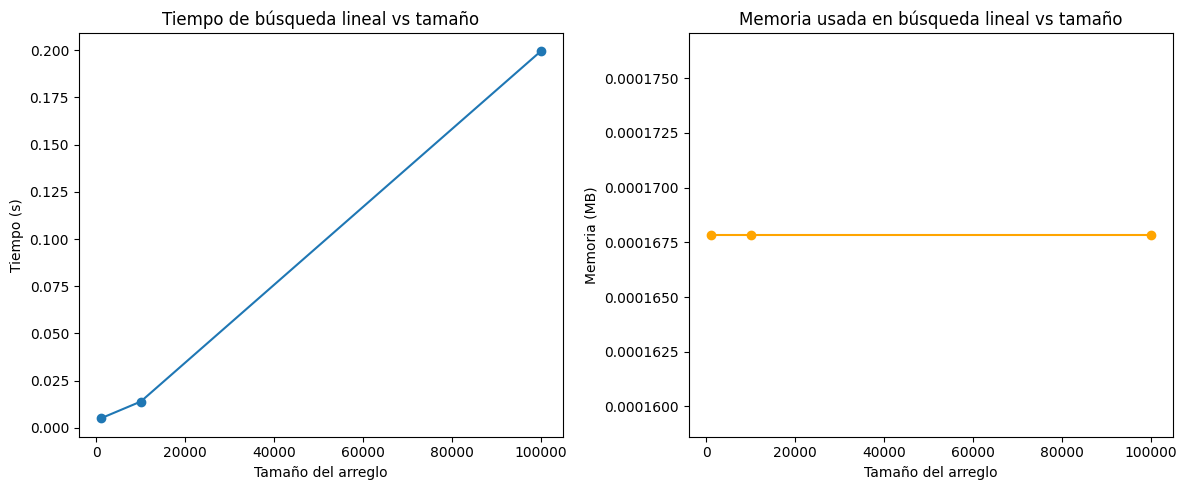

In [24]:
def busqueda_lineal(lista, objetivo):
    for i, valor in enumerate(lista):
        if valor == objetivo:
            return i
    return -1

tamanos = [10**3, 10**4, 10**5]
tiempos = []
memorias = []

print(f"{'Tamaño':<10} {'Tiempo (s)':<15} {'Memoria (MB)':<15} {'Encontrado':<12}")

for n in tamanos:
    lista = [random.randint(0, n-1) for _ in range(n)]
    objetivo = random.randint(0, n-1)

    tracemalloc.start()
    start_time = time.time()
    indice = busqueda_lineal(lista, objetivo)
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tiempos.append(end_time - start_time)
    memorias.append(peak / 1024**2)  

    print(f"{n:<10} {tiempo_transcurrido:<15.8f} {memoria_mb:<15.6f} {'Sí' if indice != -1 else 'No':<12}")

#Gráficas
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(tamanos, tiempos, marker='o')
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo de búsqueda lineal vs tamaño")

plt.subplot(1,2,2)
plt.plot(tamanos, memorias, marker='o', color='orange')
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Memoria (MB)")
plt.title("Memoria usada en búsqueda lineal vs tamaño")

plt.tight_layout()
plt.show()

Búsqueda binaria

Tamaño     Tiempo (s)      Memoria (MB)    Encontrado  
1000       0.00000000      0.000153        Sí          
10000      0.00000000      0.000153        Sí          
100000     0.00000000      0.000153        Sí          


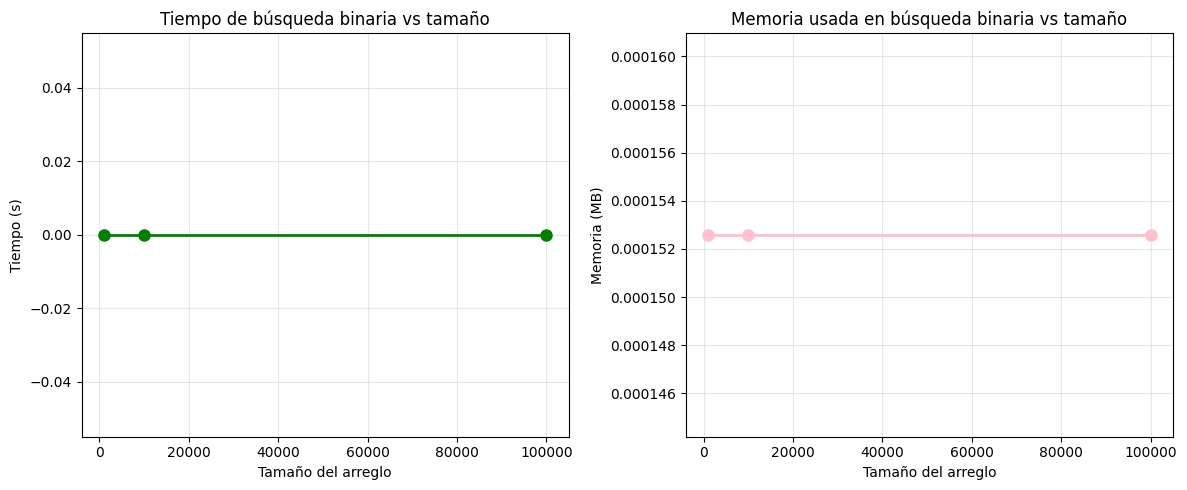

In [9]:
def busqueda_binaria(lista, objetivo):
    izquierda = 0
    derecha = len(lista) - 1
    while izquierda <= derecha:
        medio = (izquierda + derecha) // 2
        if lista[medio] == objetivo:
            return medio
        elif lista[medio] < objetivo:
            izquierda = medio + 1
        else:
            derecha = medio - 1
    return -1

tamanos = [10**3, 10**4, 10**5]
tiempos = []
memorias = []

print(f"{'Tamaño':<10} {'Tiempo (s)':<15} {'Memoria (MB)':<15} {'Encontrado':<12}")

for n in tamanos:
    lista = sorted([random.randint(0, n-1) for _ in range(n)])
    objetivo = random.choice(lista)  
    
    tracemalloc.start()
    start_time = time.time()
    indice = busqueda_binaria(lista, objetivo)
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tiempo_transcurrido = end_time - start_time
    memoria_mb = peak / (1024**2)
    
    tiempos.append(tiempo_transcurrido)
    memorias.append(memoria_mb)
    
    print(f"{n:<10} {tiempo_transcurrido:<15.8f} {memoria_mb:<15.6f} {'Sí' if indice != -1 else 'No':<12}")


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(tamanos, tiempos, marker='o', color='green', linewidth=2, markersize=8)
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo de búsqueda binaria vs tamaño")
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.plot(tamanos, memorias, marker='o', color='pink', linewidth=2, markersize=8)
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Memoria (MB)")
plt.title("Memoria usada en búsqueda binaria vs tamaño")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Ordenamiento burbuja

In [ ]:
def ordenamiento_burbuja(lista):
    for i in range(len(lista)):
        for j in range(len(lista)-i-1):
            if lista[j] > lista[j+1]:
                temp = lista[j]
                lista[j] = lista[j+1]
                lista[j+1] = temp
    return lista

tamanos = [10**3, 10**4]
tiempos = []
memorias = []

print(f"{'Tamaño':<10} {'Tiempo (s)':<15} {'Memoria (MB)':<15} {'Encontrado':<12}")

for n in tamanos:
    lista = [random.randint(0, n-1) for _ in range(n)]

    tracemalloc.start()
    start_time = time.time()
    ordenamiento_burbuja(lista)
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tiempos.append(end_time - start_time)
    memorias.append(peak / 1024**2)  

    print(f"{n:<10} {end_time - start_time:<15.6f} {peak / 1024**2:<15.6f} {'Sí':<12}")


Tamaño     Tiempo (s)      Memoria (MB)    Encontrado  
1000       2.441379        0.577108        Sí          
10000      249.597400      0.003883        Sí          


KeyboardInterrupt: 

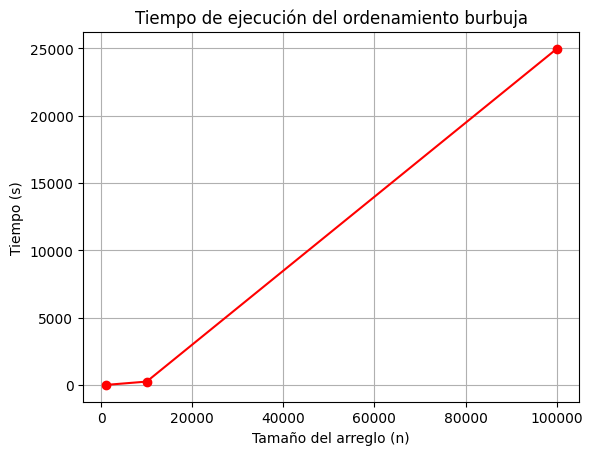

In [ ]:
tamanos = [10**3, 10**4, 10**5]
tiempos = [2.441379, 249.597400, 24960] 

plt.plot(tamanos, tiempos, marker='o', color='red')
plt.xlabel("Tamaño del arreglo (n)")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo de ejecución del ordenamiento burbuja")
plt.grid(True)
plt.show()


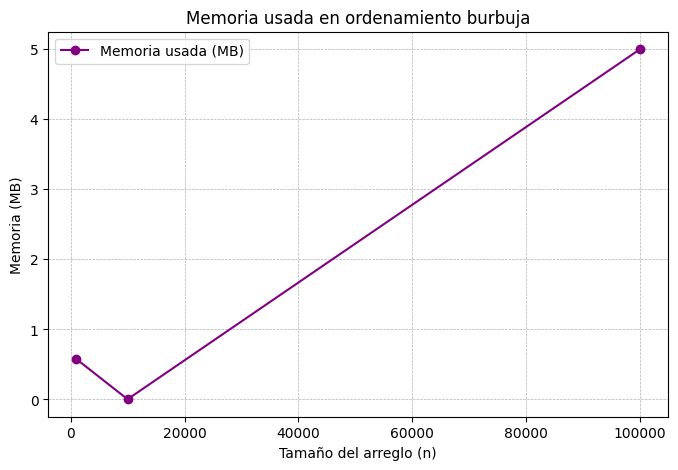

In [13]:
tamanos = [10**3, 10**4, 10**5]

memorias = [0.577108, 0.003883, 5]  


plt.figure(figsize=(8,5))
plt.plot(tamanos, memorias, marker='o', color='purple', label="Memoria usada (MB)")

plt.xlabel("Tamaño del arreglo (n)")
plt.ylabel("Memoria (MB)")
plt.title("Memoria usada en ordenamiento burbuja")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

Merge sort

In [11]:
#Mezcla

def merge(izquierda, derecha):
    resultado = []
    i = j = 0
    
    while i < len(izquierda) and j < len(derecha):
        if izquierda[i] <= derecha[j]:
            resultado.append(izquierda[i])
            i += 1
        else:
            resultado.append(derecha[j])
            j += 1
    
    # Agregar lo que sobre
    resultado.extend(izquierda[i:])
    resultado.extend(derecha[j:])
    
    return resultado

In [12]:
#ordenamiento
def merge_sort(lista):
    if len(lista) <= 1:
        return lista
    
    mitad = len(lista) // 2
    izquierda = merge_sort(lista[:mitad])
    derecha = merge_sort(lista[mitad:])
    
    return merge(izquierda, derecha)

Tamaño     Tiempo (s)      Memoria (MB)   
1000       0.04585743      0.019882       
10000      0.27861118      0.192340       
100000     2.60083699      1.908957       


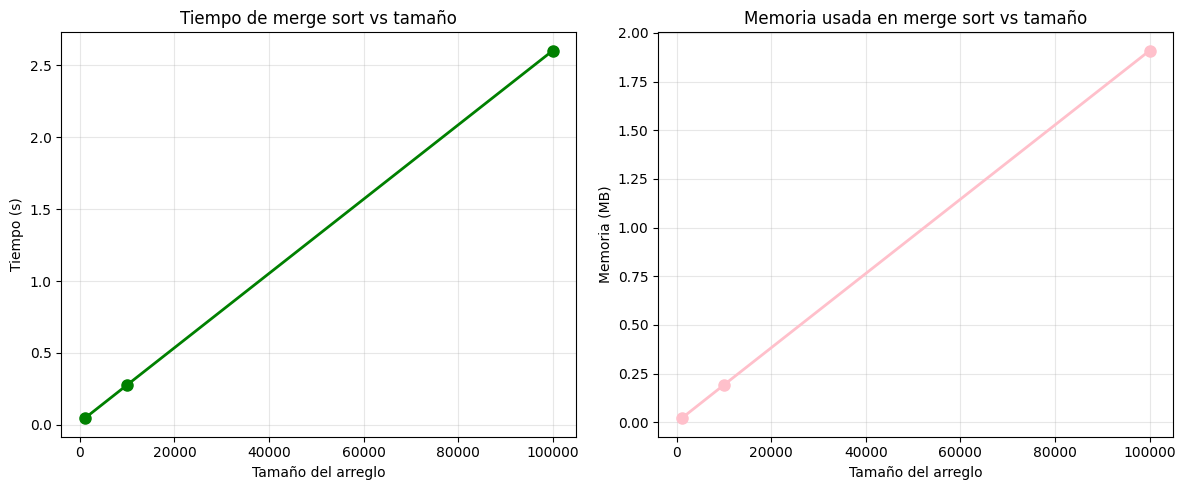

In [15]:
tamanos = [10**3, 10**4, 10**5]
tiempos = []
memorias = []

print(f"{'Tamaño':<10} {'Tiempo (s)':<15} {'Memoria (MB)':<15}")

for n in tamanos:
    lista = sorted([random.randint(0, n-1) for _ in range(n)])
    
    tracemalloc.start()
    start_time = time.time()
    ordenamiento = merge_sort(lista)
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tiempo_transcurrido = end_time - start_time
    memoria_mb = peak / (1024**2)
    
    tiempos.append(tiempo_transcurrido)
    memorias.append(memoria_mb)
    
    print(f"{n:<10} {tiempo_transcurrido:<15.8f} {memoria_mb:<15.6f}")


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(tamanos, tiempos, marker='o', color='green', linewidth=2, markersize=8)
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo de merge sort vs tamaño")
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.plot(tamanos, memorias, marker='o', color='pink', linewidth=2, markersize=8)
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Memoria (MB)")
plt.title("Memoria usada en merge sort vs tamaño")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Serie de fibonacci

Límite: 10
Serie: [0, 1, 1, 2, 3, 5, 8]
Tiempo: 0.00560093 s, Memoria: 0.000061 MB
--------------------------------------------------
Límite: 20
Serie: [0, 1, 1, 2, 3, 5, 8, 13]
Tiempo: 0.00000000 s, Memoria: 0.000061 MB
--------------------------------------------------
Límite: 30
Serie: [0, 1, 1, 2, 3, 5, 8, 13, 21]
Tiempo: 0.00000000 s, Memoria: 0.000122 MB
--------------------------------------------------
Límite: 50
Serie: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
Tiempo: 0.00000000 s, Memoria: 0.000122 MB
--------------------------------------------------
Límite: 100
Serie: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
Tiempo: 0.00000000 s, Memoria: 0.000122 MB
--------------------------------------------------


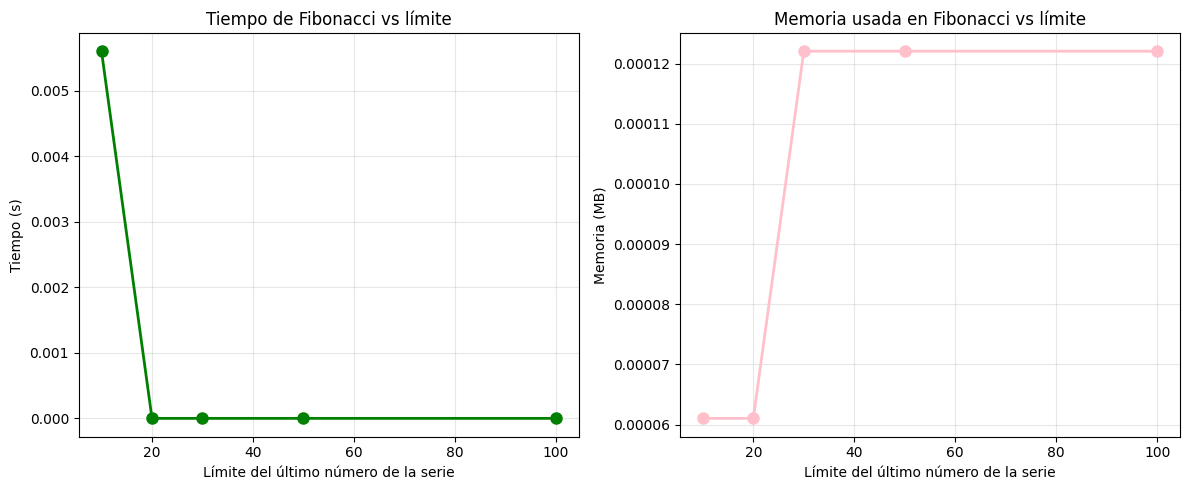

In [ ]:
def fibonacci_hasta_valor(limite):
    if limite < 0:
        return []
    serie = [0, 1]
    if limite == 0:
        return [0]
    while True:
        siguiente = serie[-1] + serie[-2]
        if siguiente > limite:
            break
        serie.append(siguiente)
    return serie

limites = [10, 20, 30, 50, 100]
tiempos = []
memorias = []

for limite in limites:
    tracemalloc.start()
    start_time = time.time()
    
    serie = fibonacci_hasta_valor(limite)
    
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tiempos.append(end_time - start_time)
    memorias.append(peak / 1024**2)
    
    print(f"Límite: {limite}")
    print(f"Serie: {serie}")
    print(f"Tiempo: {end_time - start_time:.8f} s, Memoria: {peak / 1024**2:.6f} MB")
    print("-"*50)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(limites, tiempos, marker='o', color='green', linewidth=2, markersize=8)
plt.xlabel("Límite del último número de la serie")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo de Fibonacci vs límite")
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.plot(limites, memorias, marker='o', color='pink', linewidth=2, markersize=8)
plt.xlabel("Límite del último número de la serie")
plt.ylabel("Memoria (MB)")
plt.title("Memoria usada en Fibonacci vs límite")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

